In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Handling

## Setting up datasets

In [2]:
# load both datasets
good_songs = pd.read_csv("../data/good_songs.csv")
bad_songs = pd.read_csv("../data/bad_songs.csv")

In [3]:
good_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.446,0.952,6,-5.321,1,0.0523,0.09010,0.085700,0.1120,0.624,125.303,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,https://api.spotify.com/v1/audio-analysis/7snQ...,356067,4
1,0.564,0.932,11,-10.068,1,0.0554,0.01300,0.169000,0.3490,0.619,112.937,audio_features,78lgmZwycJ3nzsdgmPPGNx,spotify:track:78lgmZwycJ3nzsdgmPPGNx,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,https://api.spotify.com/v1/audio-analysis/78lg...,146250,4
2,0.579,0.824,6,-8.710,0,0.0300,0.00206,0.009030,0.0590,0.635,123.331,audio_features,5BIMPccDwShpXq784RJlJp,spotify:track:5BIMPccDwShpXq784RJlJp,https://api.spotify.com/v1/tracks/5BIMPccDwShp...,https://api.spotify.com/v1/audio-analysis/5BIM...,331573,4
3,0.543,0.410,8,-13.253,1,0.0268,0.15700,0.000000,0.0996,0.817,95.363,audio_features,5BFWQXNGPYadZxNKxY1UfU,spotify:track:5BFWQXNGPYadZxNKxY1UfU,https://api.spotify.com/v1/tracks/5BFWQXNGPYad...,https://api.spotify.com/v1/audio-analysis/5BFW...,184893,4
4,0.904,0.463,6,-11.552,1,0.1060,0.22800,0.000041,0.3900,0.926,115.367,audio_features,0GDM5mJEisxmmyYGuC6Cla,spotify:track:0GDM5mJEisxmmyYGuC6Cla,https://api.spotify.com/v1/tracks/0GDM5mJEisxm...,https://api.spotify.com/v1/audio-analysis/0GDM...,185173,4


In [4]:
# adding the target column "liked" to the good songs
good_songs["liked"] = 1
good_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.446,0.952,6,-5.321,1,0.0523,0.09010,0.085700,0.1120,0.624,125.303,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,https://api.spotify.com/v1/audio-analysis/7snQ...,356067,4,1
1,0.564,0.932,11,-10.068,1,0.0554,0.01300,0.169000,0.3490,0.619,112.937,audio_features,78lgmZwycJ3nzsdgmPPGNx,spotify:track:78lgmZwycJ3nzsdgmPPGNx,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,https://api.spotify.com/v1/audio-analysis/78lg...,146250,4,1
2,0.579,0.824,6,-8.710,0,0.0300,0.00206,0.009030,0.0590,0.635,123.331,audio_features,5BIMPccDwShpXq784RJlJp,spotify:track:5BIMPccDwShpXq784RJlJp,https://api.spotify.com/v1/tracks/5BIMPccDwShp...,https://api.spotify.com/v1/audio-analysis/5BIM...,331573,4,1
3,0.543,0.410,8,-13.253,1,0.0268,0.15700,0.000000,0.0996,0.817,95.363,audio_features,5BFWQXNGPYadZxNKxY1UfU,spotify:track:5BFWQXNGPYadZxNKxY1UfU,https://api.spotify.com/v1/tracks/5BFWQXNGPYad...,https://api.spotify.com/v1/audio-analysis/5BFW...,184893,4,1
4,0.904,0.463,6,-11.552,1,0.1060,0.22800,0.000041,0.3900,0.926,115.367,audio_features,0GDM5mJEisxmmyYGuC6Cla,spotify:track:0GDM5mJEisxmmyYGuC6Cla,https://api.spotify.com/v1/tracks/0GDM5mJEisxm...,https://api.spotify.com/v1/audio-analysis/0GDM...,185173,4,1


In [5]:
# adding the target column to the bad songs
bad_songs["liked"] = 0
bad_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.614,0.680,6,-4.580,1,0.0289,0.3690,0.000002,0.1150,0.707,149.959,audio_features,6foY66mWZN0pSRjZ408c00,spotify:track:6foY66mWZN0pSRjZ408c00,https://api.spotify.com/v1/tracks/6foY66mWZN0p...,https://api.spotify.com/v1/audio-analysis/6foY...,234347,4,0
1,0.657,0.639,10,-7.527,1,0.0412,0.5810,0.000000,0.2780,0.674,124.882,audio_features,6sxptembJVty4sNtcPMAVz,spotify:track:6sxptembJVty4sNtcPMAVz,https://api.spotify.com/v1/tracks/6sxptembJVty...,https://api.spotify.com/v1/audio-analysis/6sxp...,234493,4,0
2,0.708,0.524,5,-12.644,1,0.0352,0.0551,0.000003,0.0371,0.690,111.482,audio_features,6iy4PoAuZBMvtrlDX4VxC7,spotify:track:6iy4PoAuZBMvtrlDX4VxC7,https://api.spotify.com/v1/tracks/6iy4PoAuZBMv...,https://api.spotify.com/v1/audio-analysis/6iy4...,200667,4,0
3,0.554,0.783,6,-5.852,1,0.0457,0.4160,0.000002,0.6310,0.813,105.390,audio_features,4w3tQBXhn5345eUXDGBWZG,spotify:track:4w3tQBXhn5345eUXDGBWZG,https://api.spotify.com/v1/tracks/4w3tQBXhn534...,https://api.spotify.com/v1/audio-analysis/4w3t...,162467,4,0
4,0.671,0.501,4,-13.119,1,0.0594,0.3420,0.000000,0.1940,0.860,87.040,audio_features,5KqldkCunQ2rWxruMEtGh0,spotify:track:5KqldkCunQ2rWxruMEtGh0,https://api.spotify.com/v1/tracks/5KqldkCunQ2r...,https://api.spotify.com/v1/audio-analysis/5Kql...,214880,4,0


In [6]:
# creating a combined dataframe with all songs
df = pd.concat([good_songs, bad_songs])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.446,0.952,6,-5.321,1,0.0523,0.09010,0.085700,0.1120,0.624,125.303,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,https://api.spotify.com/v1/audio-analysis/7snQ...,356067,4,1
1,0.564,0.932,11,-10.068,1,0.0554,0.01300,0.169000,0.3490,0.619,112.937,audio_features,78lgmZwycJ3nzsdgmPPGNx,spotify:track:78lgmZwycJ3nzsdgmPPGNx,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,https://api.spotify.com/v1/audio-analysis/78lg...,146250,4,1
2,0.579,0.824,6,-8.710,0,0.0300,0.00206,0.009030,0.0590,0.635,123.331,audio_features,5BIMPccDwShpXq784RJlJp,spotify:track:5BIMPccDwShpXq784RJlJp,https://api.spotify.com/v1/tracks/5BIMPccDwShp...,https://api.spotify.com/v1/audio-analysis/5BIM...,331573,4,1
3,0.543,0.410,8,-13.253,1,0.0268,0.15700,0.000000,0.0996,0.817,95.363,audio_features,5BFWQXNGPYadZxNKxY1UfU,spotify:track:5BFWQXNGPYadZxNKxY1UfU,https://api.spotify.com/v1/tracks/5BFWQXNGPYad...,https://api.spotify.com/v1/audio-analysis/5BFW...,184893,4,1
4,0.904,0.463,6,-11.552,1,0.1060,0.22800,0.000041,0.3900,0.926,115.367,audio_features,0GDM5mJEisxmmyYGuC6Cla,spotify:track:0GDM5mJEisxmmyYGuC6Cla,https://api.spotify.com/v1/tracks/0GDM5mJEisxm...,https://api.spotify.com/v1/audio-analysis/0GDM...,185173,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.354,0.276,0,-14.999,1,0.0295,0.74500,0.000001,0.1100,0.427,82.787,audio_features,4TMP1aRZUsG8C4HChYtfgC,spotify:track:4TMP1aRZUsG8C4HChYtfgC,https://api.spotify.com/v1/tracks/4TMP1aRZUsG8...,https://api.spotify.com/v1/audio-analysis/4TMP...,145867,3,0
96,0.596,0.626,7,-12.945,1,0.0634,0.40200,0.000000,0.0498,0.962,155.556,audio_features,5EPQbU0wk70Btiu9onZR48,spotify:track:5EPQbU0wk70Btiu9onZR48,https://api.spotify.com/v1/tracks/5EPQbU0wk70B...,https://api.spotify.com/v1/audio-analysis/5EPQ...,177693,4,0
97,0.590,0.398,1,-16.012,1,0.3800,0.78100,0.000000,0.0683,0.724,109.634,audio_features,50hbhWWZ5b36hC6x7dh4bP,spotify:track:50hbhWWZ5b36hC6x7dh4bP,https://api.spotify.com/v1/tracks/50hbhWWZ5b36...,https://api.spotify.com/v1/audio-analysis/50hb...,299747,3,0
98,0.472,0.338,2,-11.196,1,0.0273,0.85000,0.000221,0.0761,0.522,85.660,audio_features,4NRFiS0pHjTFDjOm1LWTZj,spotify:track:4NRFiS0pHjTFDjOm1LWTZj,https://api.spotify.com/v1/tracks/4NRFiS0pHjTF...,https://api.spotify.com/v1/audio-analysis/4NRF...,174827,4,0


In [7]:
# shuffling the rows in the dataframe
df = df.sample(frac=1)

## EDA

C:\Users\misha\AppData\Local\Temp\ipykernel_10764\2765984012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[["liked"]]


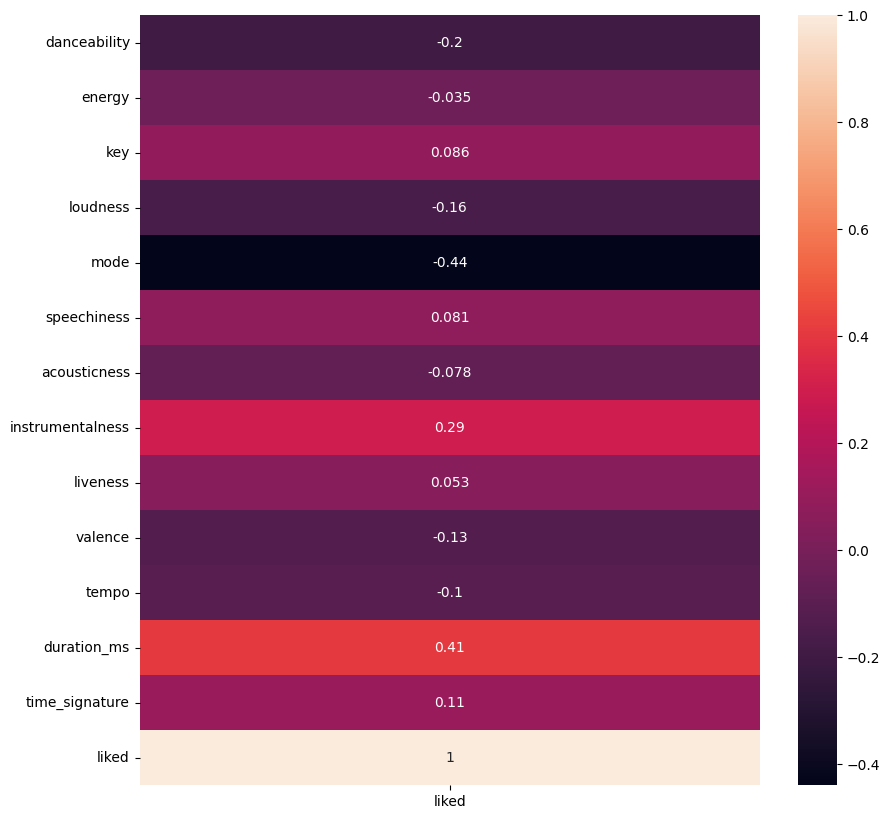

In [8]:
corr = df.corr()[["liked"]]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(
    corr, 
    annot=True,
    ax=ax
);

## Data Preprocessing

In [9]:
# drop the useless columns
df.drop(["type", "id", "uri", "track_href", "analysis_url"], axis=1,  inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
72,0.743,0.572,0,-9.627,1,0.0493,0.1860,0.000014,0.1630,0.675,122.658,178400,4,1
41,0.398,0.804,11,-5.559,1,0.0451,0.1750,0.000000,0.1810,0.709,186.752,194307,4,0
65,0.820,0.452,1,-9.796,1,0.0348,0.5430,0.002940,0.0714,0.740,117.401,253920,4,1
95,0.354,0.276,0,-14.999,1,0.0295,0.7450,0.000001,0.1100,0.427,82.787,145867,3,0
52,0.492,0.823,6,-8.526,1,0.0297,0.1270,0.000000,0.0523,0.702,94.342,215173,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.644,0.633,0,-8.006,1,0.0261,0.1020,0.000068,0.2270,0.647,115.193,194453,4,0
20,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000,208960,4,0
5,0.744,0.634,4,-11.377,1,0.0468,0.5590,0.000007,0.1180,0.774,106.316,284027,4,1
8,0.448,0.691,7,-6.957,1,0.0286,0.2860,0.001110,0.9450,0.633,88.836,153200,4,1


# Modelling